In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [24]:
from fastbook import *
from fastai.vision.widgets import *

In [4]:
python --version

NameError: name 'python' is not defined

In [5]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [10]:
key = os.environ.get('AZURE_SEARCH_KEY', 'a6b341d3747b40a984d0e41b7f48ce27')

In [7]:
help(fastbook)

Help on package fastbook:

NAME
    fastbook

PACKAGE CONTENTS
    _nbdev

FUNCTIONS
    array(...)
        array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0,
              like=None)
        
        Create an array.
        
        Parameters
        ----------
        object : array_like
            An array, any object exposing the array interface, an object whose
            __array__ method returns an array, or any (nested) sequence.
        dtype : data-type, optional
            The desired data-type for the array.  If not given, then the type will
            be determined as the minimum type required to hold the objects in the
            sequence.
        copy : bool, optional
            If true (default), then the object is copied.  Otherwise, a copy will
            only be made if __array__ returns a copy, if obj is a nested sequence,
            or if a copy is needed to satisfy any of the other requirements
            (`dtype`, `order`, etc.).
 

In [26]:
results = search_images_bing(key, 'german shepherd dogs')
images = results.attrgot('contentUrl')
len(images)

150

In [9]:
key

'9af9a3dcad20419580e2baff57486f1f'

In [27]:
images

(#150) ['http://wallpapers9.org/wp-content/uploads/2015/01/German-Shepherd-Dog-Pictures-2.jpg','https://spot-and-tango.s3.amazonaws.com/production/media/German_Shepherd_Dog_2019-08-29T202935.jpg','http://3.bp.blogspot.com/-sZiCAlma2Bs/U0zOCze9L1I/AAAAAAAACCQ/MkH--rIK8Qw/s1600/German-Shepherd-Dog-cute-wallpapers.jpg',"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Iris%2C_a_German_Shepherd_working_dog_assigned_to_the_554th_Military_Police_Company%2C_poses_for_an_official_portrait_at_the_dog_kennel's_obstacle_course%2C_Boeblingen%2C_Baden-Wurttemberg%2C_Germany%2C_June_21%2C_2013_130621-A-YI962-026.jpg/1920px-thumbnail.jpg",'http://wallpapers9.org/wp-content/uploads/2015/01/Old-German-Shepherd-Dog-Pictures-2.jpg','https://dogntreats.com/wp-content/uploads/2016/10/20110425_German_Shepherd_Dog_8505.jpg','https://www.spacecoastpetservices.com/wp-content/uploads/2020/03/german-shepherd-dog-pose.jpg','http://4.bp.blogspot.com/-4_Q84yRMeNY/U0zOUpc__jI/AAAAAAAACCY/Lz_PoBB8IB0/s1600/G

In [28]:
dog_types = ['german shepherd', 'black' 'labrador']
path = Path('dogs')

In [29]:
if not path.exists():
    path.mkdir()
    for t in dog_types:
        dest = (path/t)
        print(dest)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, '{} dog'.format(t))
        download_images(dest, urls=results.attrgot('contentUrl'))

In [31]:
path

Path('dogs')

In [30]:
files = get_images_files(path)

NameError: name 'get_images_files' is not defined

In [32]:
search_images_bing


<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [33]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [34]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

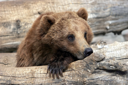

In [35]:
im = Image.open(dest)
im.to_thumb(128,128)

In [36]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [42]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [43]:
fns = get_image_files(path)
fns

(#416) [Path('bears/black/00000000.JPG'),Path('bears/black/00000001.jpg'),Path('bears/black/00000002.jpg'),Path('bears/black/00000003.jpg'),Path('bears/black/00000004.jpg'),Path('bears/black/00000005.jpg'),Path('bears/black/00000006.jpg'),Path('bears/black/00000007.jpg'),Path('bears/black/00000008.jpg'),Path('bears/black/00000009.jpg')...]

In [44]:
failed = verify_images(fns)
failed

(#47) [Path('bears/black/00000001.jpg'),Path('bears/black/00000010.jpg'),Path('bears/black/00000020.jpg'),Path('bears/black/00000036.jpg'),Path('bears/black/00000041.jpg'),Path('bears/black/00000043.jpg'),Path('bears/black/00000061.jpg'),Path('bears/black/00000062.jpg'),Path('bears/black/00000101.jpg'),Path('bears/black/00000111.jpg')...]

In [45]:
failed.map(Path.unlink); 

In [46]:
??verify_images

In [47]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [50]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [51]:
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


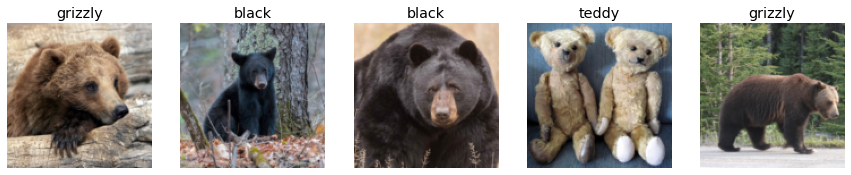

In [52]:
dls.valid.show_batch(max_n=5, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


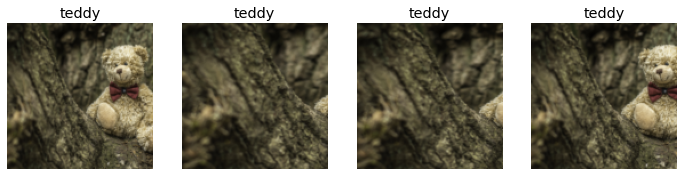

In [54]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


D:\Users\livxd00\Anaconda3\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


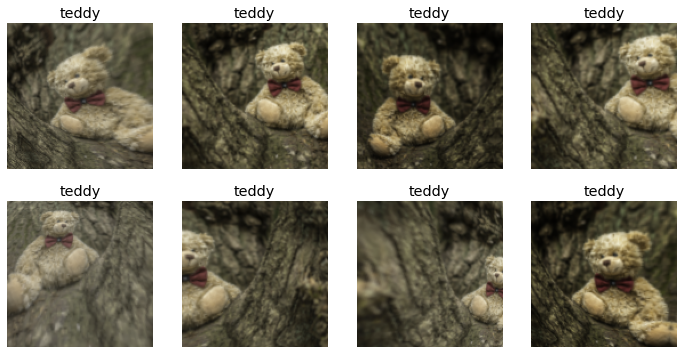

In [55]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [56]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [57]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to D:\Users\livxd00/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.425013,0.105646,0.027397,01:33


epoch,train_loss,valid_loss,error_rate,time
0,0.220743,0.054748,0.027397,02:12
1,0.145036,0.038657,0.013699,01:50
2,0.110254,0.053802,0.041096,01:58
3,0.094267,0.060667,0.027397,02:03


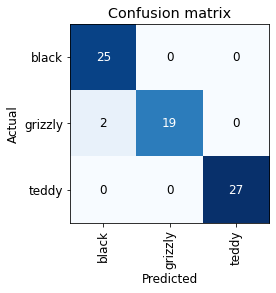

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

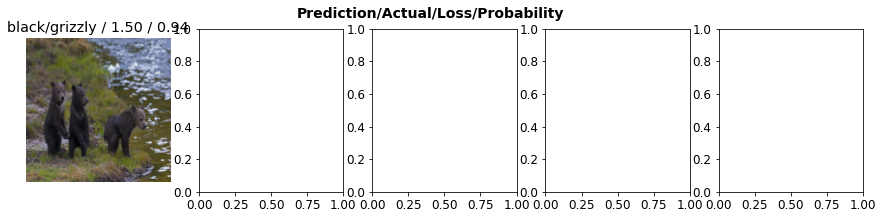

In [59]:
interp.plot_top_losses(5, nrows=1)

In [60]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [61]:
learn.export()

In [63]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [65]:
learn_inf = load_learner(path/'export.pkl')

In [66]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([2.6817e-06, 1.0000e+00, 4.7569e-08]))

In [67]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [68]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [70]:
img = PILImage.create(btn_upload.data[-1])

In [71]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [73]:
pred,pred_idx,probs = learn_inf.predict(img)

In [74]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9998')

In [75]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [76]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pre,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [77]:
btn_upload = widgets.FileUpload()

In [78]:
VBox([widgets.Label('Select your bear!'),
     btn_upload, btn_run, out_pl, lbl_pred])

In [79]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
nbdev 1.1.22 requires nbconvert<6, but you have nbconvert 6.2.0 which is incompatible.
Enabling: voila
- Writing config: D:\Users\livxd00\Anaconda3\etc\jupyter
    - Validating...
      voila 0.2.16 ok
